In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

In [2]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel('./data/이러닝_이용률_.xlsx')

C:\Users\admin\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df

,특성별(1),특성별(2),2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,...,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1
0,특성별(1),특성별(2),이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률,...,이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률,이용률
1,특성별(1),특성별(2),예,아니오,예,아니오,예,아니오,예,아니오,...,예,아니오,예,아니오,예,아니오,예,아니오,예,아니오
2,전체,소계,45.0,55.0,48.3,51.7,49.0,51.0,52.8,47.2,...,58.7,41.3,58.9,41.1,59.0,41.0,59.2,40.8,62.5,37.5
3,성별,남자,47.6,52.4,50.4,49.6,50.7,49.3,53.1,46.9,...,59.4,40.6,59.3,40.7,59.6,40.4,59.9,40.1,63.9,36.1
4,NaN,여자,41.9,58.1,46.1,53.9,47.1,52.9,52.5,47.5,...,57.9,42.1,58.3,41.7,58.4,41.6,58.6,41.4,61.1,38.9


In [5]:
# 정제를 위한 행렬변환
df = df.T.reset_index()

In [6]:
# 이러닝 이용자, 미사용자 나누기
df_yes = df[df[1] == '예']
df_no = df[df[1] == '아니오']

In [7]:
# 불필요한 컬럼제거
e_learning_yes = df_yes.drop(columns=[0,1,3,4])
e_learning_no = df_no.drop(columns=[0,1,3,4])

In [8]:
# merge(join)을 위한 연도 컬럼 정제
e_learning_no['index'] = e_learning_no['index'].str.split('.',expand=True)[0]

In [9]:
# merge
e_learning_final = pd.merge(e_learning_yes, e_learning_no, how='left',left_on='index', right_on='index')

In [10]:
e_learning_final

,index,2_x,2_y
0,2008,45.0,55.0
1,2009,48.3,51.7
2,2010,49.0,51.0
3,2011,52.8,47.2
4,2012,53.3,46.7
5,2013,57.1,42.9
6,2014,57.6,42.4
7,2015,58.2,41.8
8,2016,58.7,41.3
9,2017,58.9,41.1


In [11]:
# 컬럼명 재정의
e_learning_final = e_learning_final.rename(columns={'index':'연도', '2_x':'예', '2_y':'아니오'})

In [12]:
e_learning_final

,연도,예,아니오
0,2008,45.0,55.0
1,2009,48.3,51.7
2,2010,49.0,51.0
3,2011,52.8,47.2
4,2012,53.3,46.7
5,2013,57.1,42.9
6,2014,57.6,42.4
7,2015,58.2,41.8
8,2016,58.7,41.3
9,2017,58.9,41.1


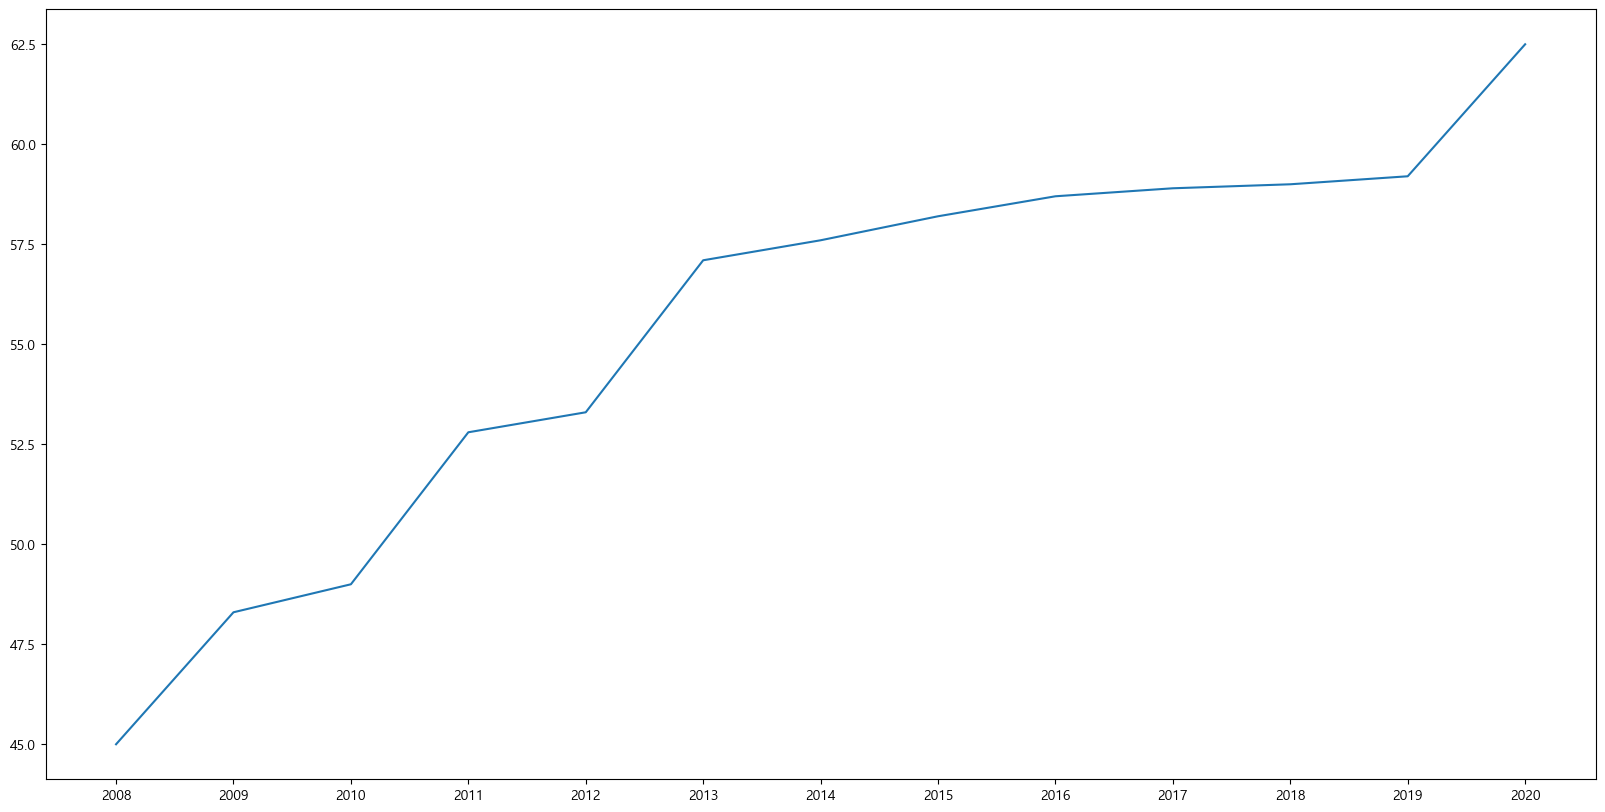

In [14]:
fig = plt.figure(figsize=(20,10))
plt.plot(e_learning_final['연도'], e_learning_final['예'])
# plt.plot(e_learning_final['연도'], e_learning_final['아니오'])
# plt.legend(['예','아니오'],fontsize=13,loc ='upper left', frameon=False)
plt.show()